In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:\\Users\\Puja\\Downloads\\uber.csv")


In [3]:
df.shape

(200000, 9)

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='key',axis=1,inplace=True)

In [10]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])


In [11]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

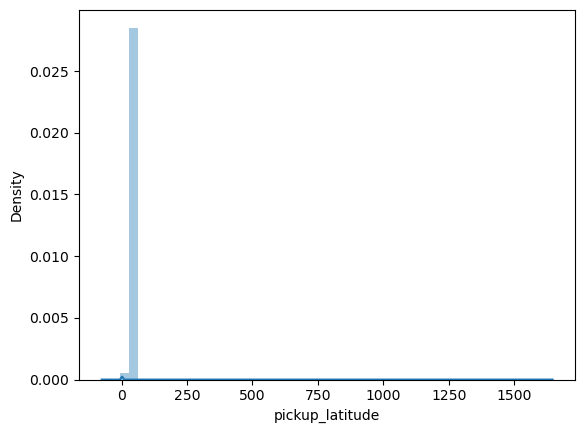

In [12]:
sns.distplot(df['pickup_latitude'])

<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

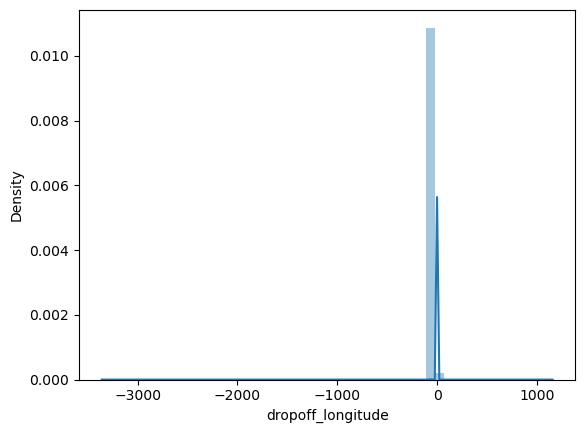

In [13]:
sns.distplot(df['dropoff_longitude'])

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

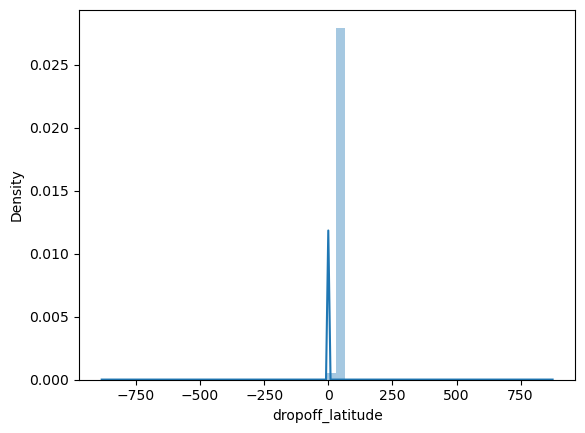

In [14]:
sns.distplot(df['dropoff_latitude'])

In [15]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [16]:
outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [17]:
outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [18]:
upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154774204
-18.3453884488253


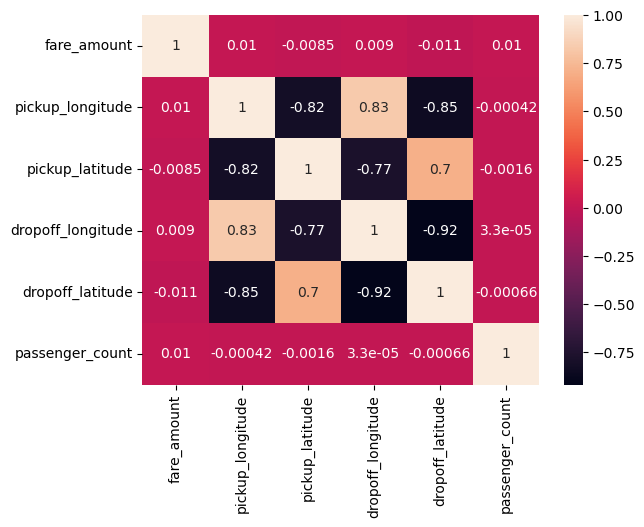

In [19]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [20]:
import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [21]:
df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   day                199999 non-null  int64  
 7   hour               199999 non-null  int64  
 8   month              199999 non-null  int64  
 9   year               199999 non-null  int64  
 10  weekday            199999 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x=df.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0
199996,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,5
199997,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1
199998,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3


In [25]:
y=df["fare_amount"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


In [27]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
80768,-73.983703,40.725752,-73.972000,40.793888,1,22,1,2,2009,0
111783,-73.961175,40.760667,-73.976507,40.747570,1,7,14,3,2009,6
24615,-73.947784,40.783111,-73.955408,40.779405,1,17,11,3,2011,4
46932,-73.980596,40.733797,-73.972092,40.747297,1,15,7,1,2010,5
86655,-73.963035,40.758380,-73.987877,40.745477,2,28,19,6,2014,6


In [28]:
y_train.head()

80768     19.7
111783     7.7
24615      4.5
46932      4.5
86655     10.0
Name: fare_amount, dtype: float64

In [29]:
y_test.head()

13588      5.5
29803     11.3
138265     6.5
82856     18.1
162747    11.3
Name: fare_amount, dtype: float64

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(159999, 10)
(40000, 10)
(40000,)
(159999,)


In [31]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [32]:
predictedvalues = lrmodel.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.80668770843381


In [34]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [ ]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

In [ ]:
from sklearn.metrics import r2_score

In [38]:
r2_score=r2_score(y_test,rfrmodel_pred)

In [39]:
r2_score

0.7687510594898492